## Redes Neuronales - Trabajo Practico N°1 - Clasificación Multiclase
### Dataset Yeast 
es un dataset para construir un predictor de sitios específicos de anclaje de proteínas de levaduras basado en información de las secuencias de aminoácidos que forman a la proteína (problema de clasificación multiclase).

In [2]:
from sys import path
from os.path import realpath
path.append(realpath("../")) # Makes it works everywhere
import pandas as pd
import src.functions as nn
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder
#import src.helper as helper
#import src.multiclass_helper as mc
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
columns = ["mcg","gvh","alm","mit","erl","pox","vac","nuc"]
df = pd.read_csv("data/yeast.data",names = ["Name"] + columns + ["Class"], sep='\s+')

#### Análisis exploratorio de datos (EDA)


In [5]:
df

,Name,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [20]:
clases = df["Class"].drop_duplicates().to_list()
for clase in clases:
    num = df[df["Class"] == clase].shape[0]
    prob = df[df["Class"] == clase].shape[0]/df.shape[0]
    print(f"{clase} cantidad: {num} \t Probabilidad: P(X|Y=\"{clase}\")={np.round(prob,2)}")

MIT cantidad: 244 	 Probabilidad: P(X|Y="MIT")=0.16
NUC cantidad: 429 	 Probabilidad: P(X|Y="NUC")=0.29
CYT cantidad: 463 	 Probabilidad: P(X|Y="CYT")=0.31
ME1 cantidad: 44 	 Probabilidad: P(X|Y="ME1")=0.03
EXC cantidad: 35 	 Probabilidad: P(X|Y="EXC")=0.02
ME2 cantidad: 51 	 Probabilidad: P(X|Y="ME2")=0.03
ME3 cantidad: 163 	 Probabilidad: P(X|Y="ME3")=0.11
VAC cantidad: 30 	 Probabilidad: P(X|Y="VAC")=0.02
POX cantidad: 20 	 Probabilidad: P(X|Y="POX")=0.01
ERL cantidad: 5 	 Probabilidad: P(X|Y="ERL")=0.0


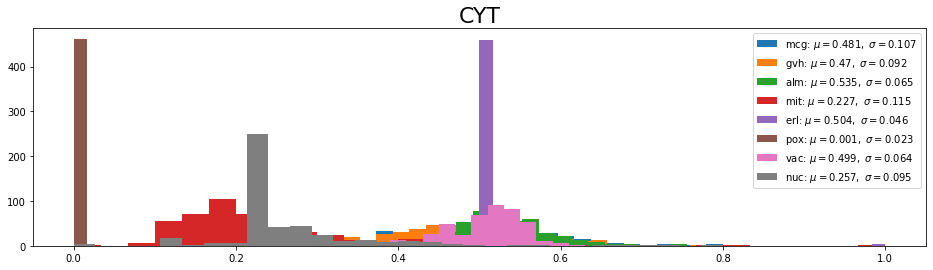

<AxesSubplot:>

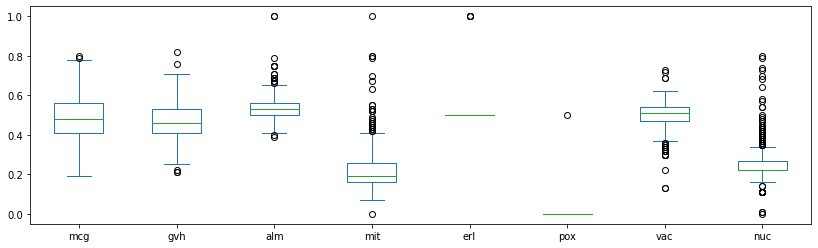

In [8]:
nn.pretty_hist(df,"CYT",columns,bins=30,title="CYT",figsize=(16,4))
df[df["Class"] == "CYT"].plot(kind="box",figsize=(14,4))

In [9]:
df[df["Class"] == "MIT"].describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,244.000000,244.000000,244.000000,244.000000,244.0,244.000000,244.000000,244.000000
mean,0.521434,0.533238,0.517377,0.404426,0.5,0.008852,0.501680,0.240984
std,0.097238,0.098515,0.072926,0.165850,0.0,0.081364,0.046508,0.056980
min,0.230000,0.180000,0.290000,0.110000,0.5,0.000000,0.260000,0.110000
25%,0.460000,0.470000,0.470000,0.270000,0.5,0.000000,0.480000,0.220000
50%,0.510000,0.530000,0.520000,0.410000,0.5,0.000000,0.500000,0.220000
75%,0.582500,0.590000,0.560000,0.520000,0.5,0.000000,0.530000,0.250000
max,0.810000,1.000000,0.720000,0.870000,0.5,0.830000,0.690000,0.650000


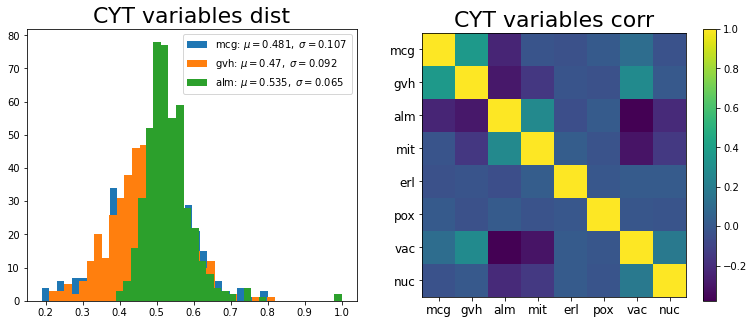

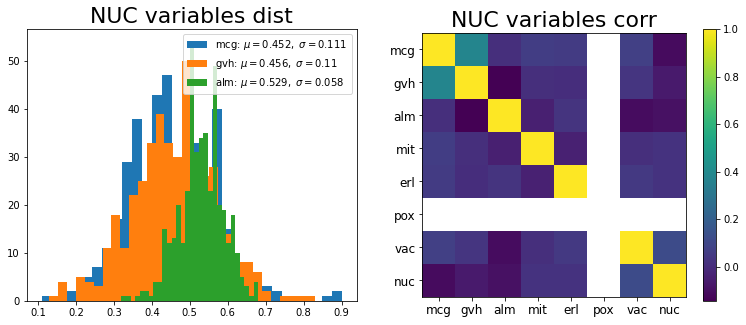

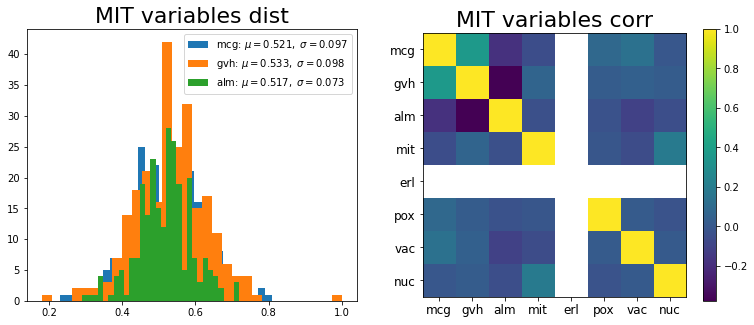

In [10]:
nn.pretty_class_EDA(df,"CYT",["mcg","gvh","alm"],bins=30,figsize=(13,5))
nn.pretty_class_EDA(df,"NUC",["mcg","gvh","alm"],bins=30,figsize=(13,5))
nn.pretty_class_EDA(df,"MIT",["mcg","gvh","alm"],bins=30,figsize=(13,5))
# Los blancos son NaN que significan que no tienen correlación

In [11]:
# nn.pretty_hist2d(df[df["Class"] == "MIT"],["mcg","gvh"],bins=20)
# nn.pretty_hist2d(df[df["Class"] == "NUC"],["mcg","gvh"],bins=20)
# nn.pretty_hist2d(df[df["Class"] == "CYT"],["mcg","gvh"],bins=20)

In [12]:
rvs = []
for clase in ["NUC","CYT","MIT"]:
    rvs.append([df[df["Class"] == clase].mean(numeric_only=True).to_list(),df[df["Class"] == clase].cov().to_numpy(),df[df["Class"] == clase].shape[0]])

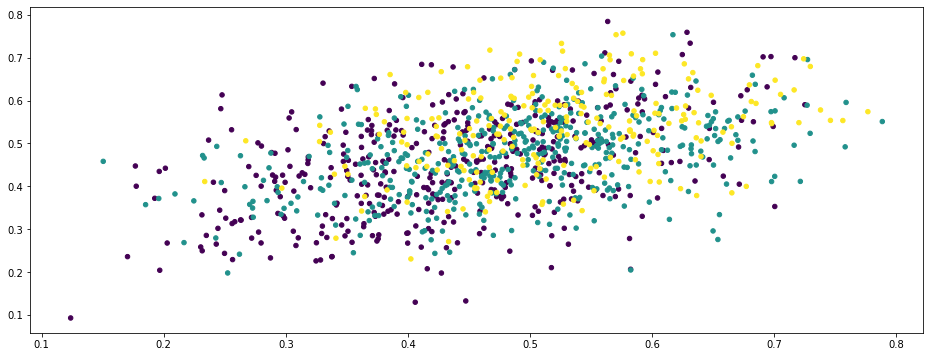

In [13]:
nn.pretty_scatter(rvs)